# Support Vector Machine

### What are the hyper-parameters?

In [2]:
from sklearn import datasets

cancer = datasets.load_breast_cancer()

In [3]:
# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [4]:
# print data(feature)shape
cancer.data.shape

(569, 30)

In [6]:
print(cancer.data)
print(cancer.target)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [4]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_valid, y_train, y_valid = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [5]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', gamma='auto', C=1) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_valid)

In [6]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_valid, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_valid, y_pred))


('Accuracy:', 0.9649122807017544)
('Precision:', 0.9811320754716981)
('Recall:', 0.9629629629629629)


In [7]:
y_pred = clf.predict(X_train)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_train, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_train, y_pred))

('Accuracy:', 0.9623115577889447)
('Precision:', 0.9606299212598425)
('Recall:', 0.9799196787148594)


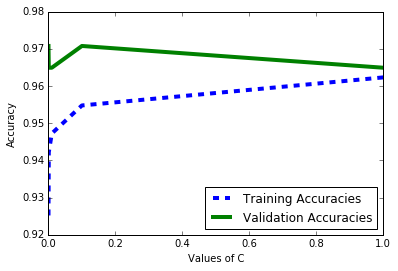

In [10]:
train_accs=[]
valid_accs=[]
param_C=[1, 0.1, 0.01, 0.001, .0001]
for c in param_C:
    clf = svm.SVC(kernel='linear', C=c) # Linear Kernel

    #Train the model using the training sets
    clf.fit(X_train, y_train)

    #Predict the response for test dataset
    y_valid_pred = clf.predict(X_valid)
    
    #Predict the response for train dataset
    y_train_pred = clf.predict(X_train)
    
    train_accs.append(metrics.accuracy_score(y_train, y_train_pred))
    valid_accs.append(metrics.accuracy_score(y_valid, y_valid_pred))


CreateGraph(param_C, train_accs, valid_accs)
#BarPlot(param_C, train_accs, test_accs)


# Helper Functions

In [9]:
import matplotlib.pylab as plt
%matplotlib inline

def CreateGraph(C, train_accs, test_accs):
    fig, ax = plt.subplots()
    ax.plot(C, train_accs, '--', linewidth=4, label='Training Accuracies')
    ax.plot(C, test_accs, '-', linewidth=4, label='Validation Accuracies')
    ax.set_xlabel("Values of C")
    ax.set_ylabel("Accuracy")
    ax.legend(loc='lower right')
    plt.show()

In [11]:
def BarPlot(C, train_accs, test_accs):
    n=len(C)

    fig, ax = plt.subplots()

    index = np.arange(n)
    bar_width = 0.3

    opacity = 0.7
    error_config = {'ecolor': '0.3'}

    rects1 = ax.bar(index, train_accs, bar_width, alpha=opacity, color='b', error_kw=error_config, label='Training')

    rects2 = ax.bar(index + bar_width, test_accs, bar_width, alpha=opacity, color='r', error_kw=error_config, label='Test')

    ax.set_xlabel('Values of C')
    ax.set_ylabel('Accuracy')
    ax.set_title('Learning parameter C')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(('1', '0.1', '0.01', '0.001', '.0001'))
    ax.legend()

    fig.tight_layout()
    #plt.show()
    plt.show()
    